In [12]:
import sqlite3
import pandas as pd

try:
    sqlite_connection = sqlite3.connect('../data/checking-logs.sqlite.sqlite')
    print('УСПЕШНО')
except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)


УСПЕШНО


In [13]:
request = "select uid, datetime from pageviews where uid like 'user_%'"
df = pd.io.sql.read_sql(request, sqlite_connection, parse_dates=['datetime'])
df

,uid,datetime
0,user_30,2020-04-17 22:46:26.785035
1,user_14,2020-04-18 10:53:52.623447
2,user_17,2020-04-18 10:56:55.833899
3,user_14,2020-04-18 10:57:37.331258
4,user_17,2020-04-18 12:05:48.200144
...,...,...
982,user_28,2020-05-21 18:45:20.441142
983,user_19,2020-05-21 23:03:06.457819
984,user_25,2020-05-21 23:23:49.995349
985,user_5,2020-05-22 11:30:18.368990


In [14]:
df_views = df.groupby(df['datetime'].dt.floor('d')).count()['uid']

<AxesSubplot: title={'center': 'Views per day'}, xlabel='datetime'>

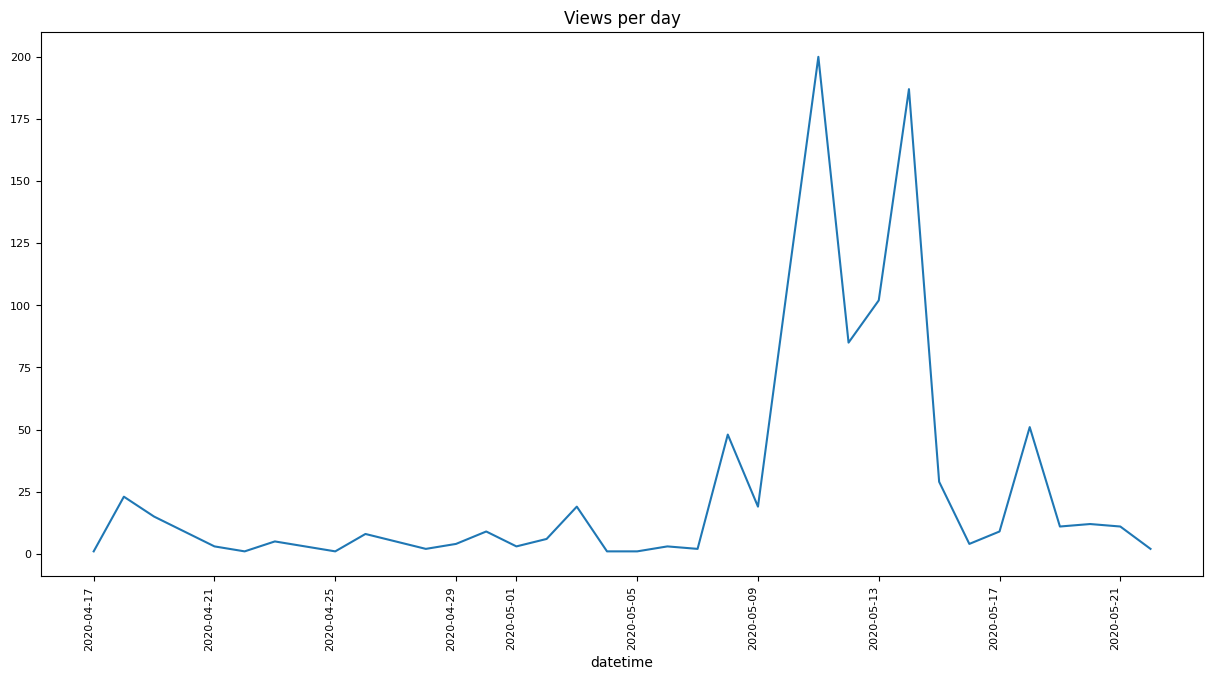

In [29]:
df_views.plot(x='date', y='views', figsize=(15, 8),
          title='Views per day', rot=90, fontsize=8)

In [16]:
sqlite_connection.close()